In [1]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_policy_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy
0,2875.718243,3096.192445,3048.444596,58,4158.888594,0,0
1,3440.468891,3150.062174,2617.253023,58,3873.836019,0,0
2,3438.923569,3194.824285,3331.386535,85,4336.175905,0,0
3,3312.142295,3782.317222,2812.941804,58,4290.671869,0,0
4,3566.083221,3224.355707,2651.093714,58,4267.245505,0,0
...,...,...,...,...,...,...,...
109,3542.386472,3402.253577,2844.286763,58,4063.034483,0,0
110,3479.826143,3660.793754,3252.141521,20,4243.421188,0,0
111,3555.100419,3697.338326,2900.997598,20,4328.900773,0,0
112,3376.123299,3750.676360,2963.389376,20,4202.607107,0,0


/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

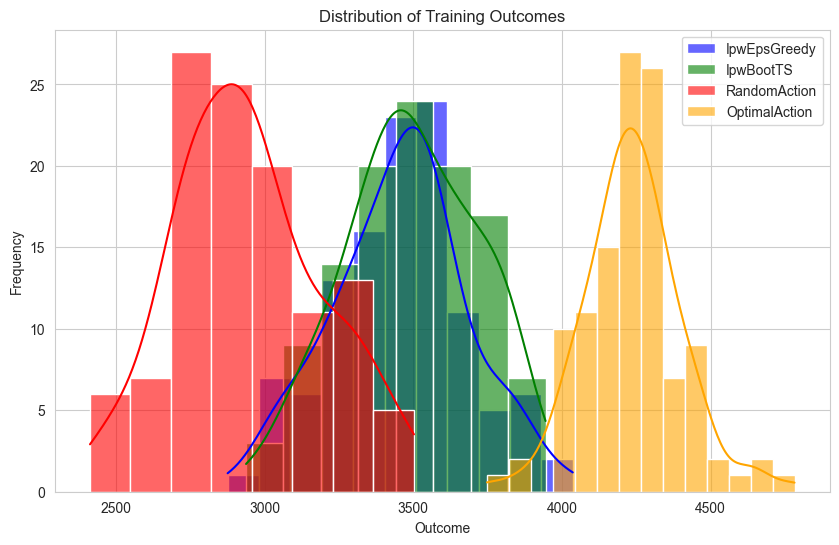

(-1.3240215611335568, 0.18683344421995662)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set the style of the visualizations
sns.set_style("whitegrid")

# Plot the distributions of both methods
plt.figure(figsize=(10, 6))
sns.histplot(data['IpwEpsGreedy'], color="blue", kde=True, label='IpwEpsGreedy', alpha=0.6)
sns.histplot(data['IpwBootTS'], color="green", kde=True, label='IpwBootTS', alpha=0.6)
sns.histplot(data['RandomAction'], color="red", kde=True, label='RandomAction', alpha=0.6)
sns.histplot(data['optimal_outcome_actions'], color="orange", kde=True, label='OptimalAction', alpha=0.6)

plt.title('Distribution of Training Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conduct a two-sample t-test to compare the means
t_stat, p_value = ttest_ind(data['IpwEpsGreedy'], data['IpwBootTS'])

t_stat, p_value


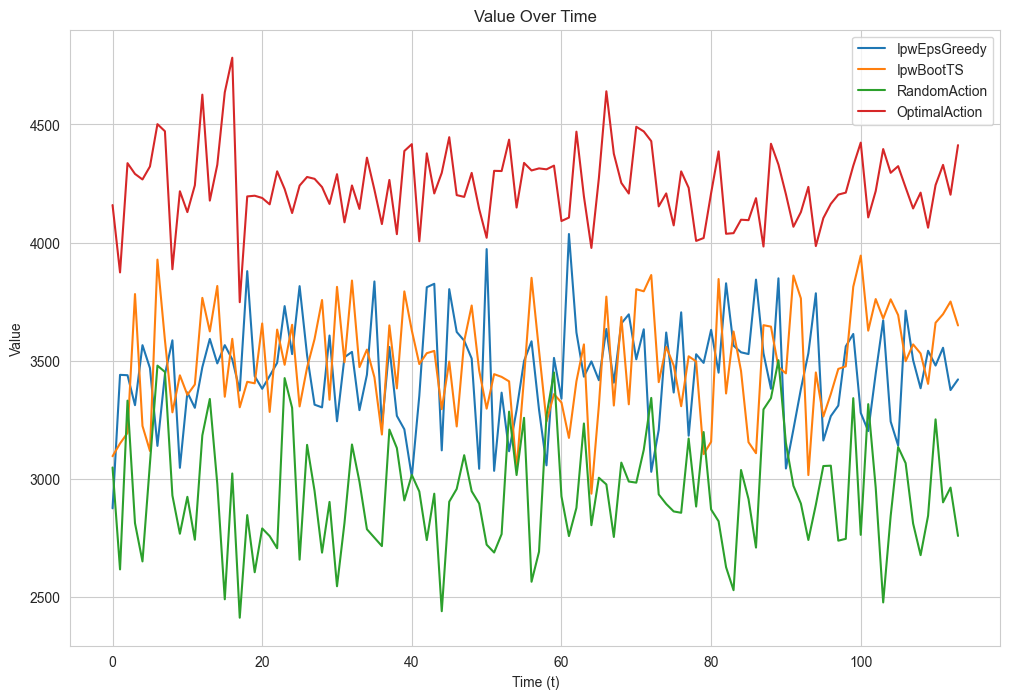

In [3]:
import matplotlib.pyplot as plt

# Assuming row index as the time variable for plotting
# Let's plot a few selected columns to keep the plot readable

plt.figure(figsize=(12, 8))

# Plotting selected columns
plt.plot(data.index, data['IpwEpsGreedy'], label='IpwEpsGreedy')
plt.plot(data.index, data['IpwBootTS'], label='IpwBootTS')
plt.plot(data.index, data['RandomAction'], label='RandomAction')
plt.plot(data.index, data['optimal_outcome_actions'], label='OptimalAction')

plt.title('Value Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()
